In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
%matplotlib inline
!pip install xlrd
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
#import data
file_id = '1FUEGrMiWVjgYlWpP7H5FD3gvTNiBEkOR'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Book1.xlsx')
data = pd.ExcelFile("Book1.xlsx", index=False)
data = data.parse("Sheet1", encoding="utf-8")

In [4]:
data.head()

,date,mean_level
0,2015-06-15,176.500000
1,2015-06-16,166.333333
2,2015-06-17,187.333333
3,2015-06-18,183.833333
4,2015-06-19,168.166667


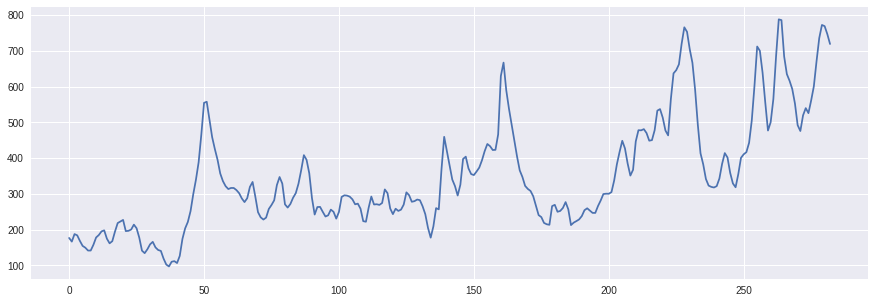

In [5]:
pd.Series(data['mean_level'].values).plot(figsize=(15,5))
plt.show()

In [6]:
rng=pd.date_range(start='15/6/2015',periods=283,freq='D')
ts=pd.Series(data['mean_level'].values,index=rng)
print(ts.head())

2015-06-15    176.500000
2015-06-16    166.333333
2015-06-17    187.333333
2015-06-18    183.833333
2015-06-19    168.166667
Freq: D, dtype: float64


In [0]:
mod_waterlevel = sm.tsa.MarkovRegression(ts, k_regimes=2)
res_waterlevel = mod_waterlevel.fit()

In [8]:
res_waterlevel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                      y   No. Observations:                  283
Model:               MarkovRegression   Log Likelihood               -1691.393
Date:                Sun, 20 Jan 2019   AIC                           3392.786
Time:                        09:34:37   BIC                           3411.013
Sample:                    06-15-2015   HQIC                          3400.095
                         - 03-23-2016                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        274.4771      6.577     41.735      0.000     261.587     287.367
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        570.1048     12.855     44.348      0.000     544.909     595.301
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7695.3477    656.315     11.725      0.000    6408.994    8981.701
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9822      0.009    109.654      0.000       0.965       1.000
p[1->0]        0.0465      0.024      1.897      0.058      -0.002       0.094
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical differentiation.
"""

In [9]:
d={'date':data['date'].values,'high probabilities':res_waterlevel.smoothed_marginal_probabilities[1].values}
df=pd.DataFrame(data=d)
print(df.head())

        date  high probabilities
0 2015-06-15        1.440569e-06
1 2015-06-16        4.618641e-08
2 2015-06-17        1.033212e-07
3 2015-06-18        9.032407e-08
4 2015-06-19        4.947707e-08


In [0]:
year1=df[(df["date"]>='2015-06-15') & (df["date"]<='2015-09-30')]
year2=df[(df["date"]>='2016-06-15') & (df["date"]<='2016-09-30')]
year3=df[(df["date"]>'2016-09-30')]

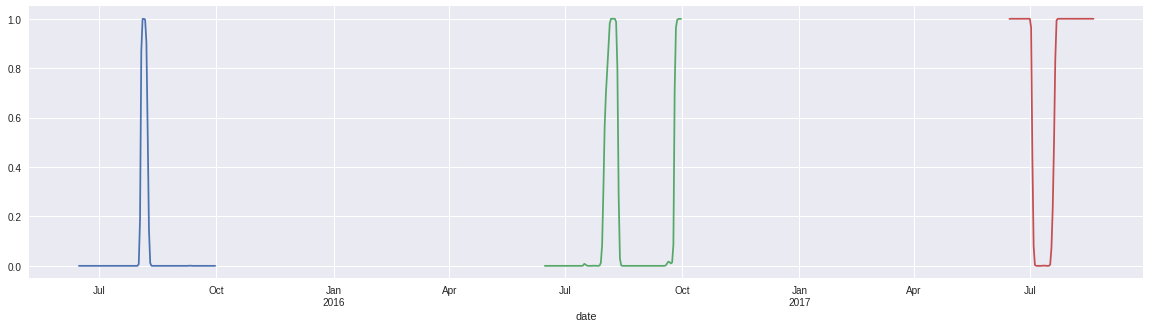

In [11]:
pd.Series(year1['high probabilities'].values,index=year1['date']).plot(figsize=(20,5))
pd.Series(year2['high probabilities'].values,index=year2['date']).plot(figsize=(20,5))
pd.Series(year3['high probabilities'].values,index=year3['date']).plot(figsize=(20,5))
# plt.figure(figsize=(25,10))
plt.show()

In [12]:
print(res_waterlevel.expected_durations)

[56.04311858 21.52545622]
